# Assignment 1: Clustering     Member: Wenhao Hou, Jianzhang Chen

In [ ]:
# Set up Notebook

% matplotlib inline

# Standard imports
import matplotlib.pyplot as plt
import re
import glob
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import pandas as pd
# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Import the dataset from the path
files = glob.glob('/Users/houwenhao/Desktop/graduate_study/ML/Health-Tweets/*')

### As we discussed in forum before, the first visulaized graph without text processing contains a lot of words like "on", "for", "is" which are definitely unrelated to the health topic. So in this case, we apply the stopwords from nltk package to firstly filter these unwanted words out.


In [36]:
# set the stop word list 
stop_words = set(stopwords.words('english'))
stop_words.add('video')
stop_words.add('audio')
stop_words.add('new')
stop_words.add('e')
stop_words.add('--')
stop_words.add('a')
stop_words.add('amp')
stop_words.add('u')
stop_words.add('ampe')
stop_words.add('may')
stop_words.add('com')
stop_words.add('q')

### Standardization: Remove all raw punctuations and numbers before visualization

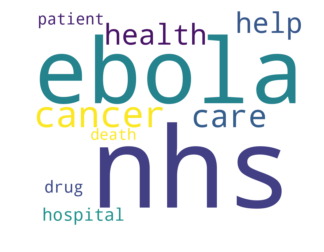

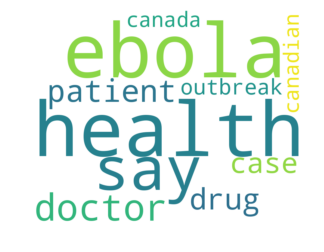

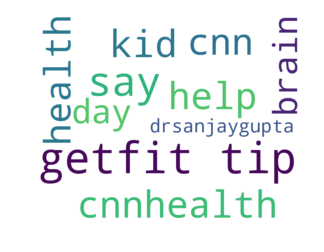

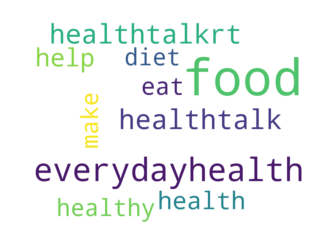

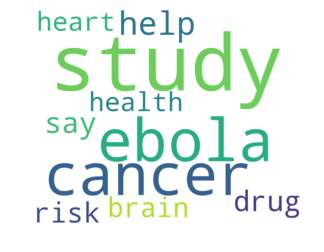

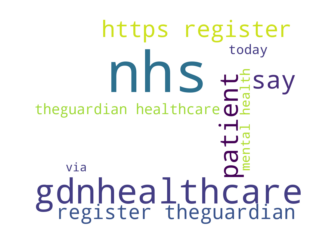

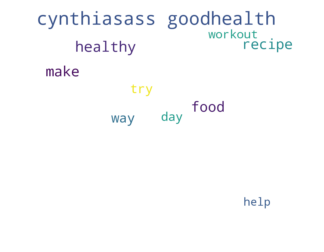

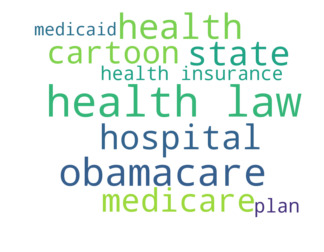

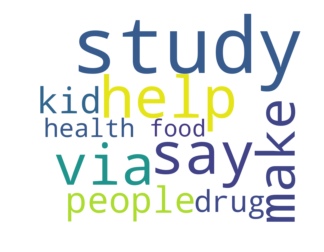

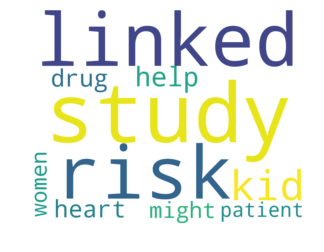

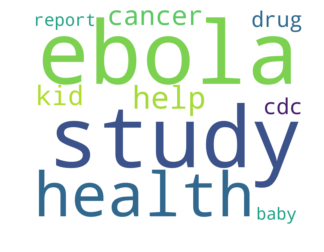

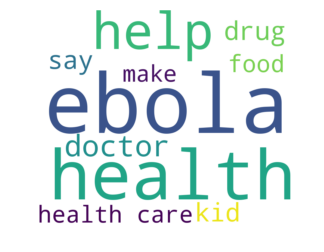

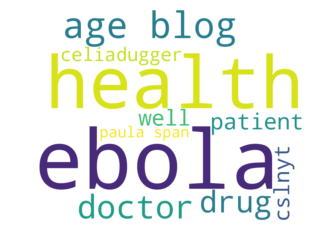

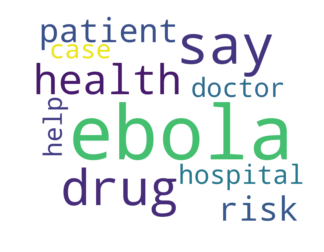

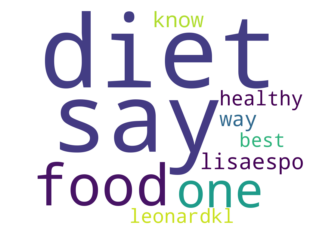

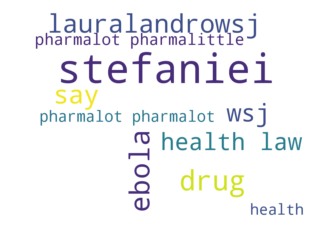

In [44]:
word_dict={}
o_dict={}
for index, file in enumerate(files):
    file = file
    tweets = []
    try:
        with open(file, 'r', encoding='utf-8') as f:
            lines = f.readlines()
            f.close()
    except:
        with open(file, 'r', encoding='cp1252') as f:
            lines = f.readlines()
            f.close()
    for line in lines:
        try:
            tw = line.split('|')[2].split('http:')[0]
            tw = re.sub('[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（);:]+', ' ', tw).strip()
            tw= tw.replace('amp','')
            tw = re.sub('\d', '', tw).strip()

            tweets.append(tw)
           
        except:
            tw = re.sub('[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（);:]+', ' ', tw).strip()
            tw = tw.replace('amp', '')
            tweets.append(tw)
    

    # Parse text into words, make lowercase and remove stop words
    txts = [[word for word in tweet.lower().split() if word not in stop_words]
            for tweet in tweets]

    frequency = Counter([word for txt in txts for word in txt])
    top10 = frequency.most_common(10)
    word_dict[file.split('/')[-1]] = top10
    words = ''
    for txt in txts:
        words += " ".join(txt)
    
    # Visualize the 10 most common health word with wordcloud package in each txt
    wc = WordCloud(max_words=10,
                   background_color='white',
                   width=1000,
                   height=800).generate(words)

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('{}.png'.format(index), width=1000, height=800)
    plt.show()
    plt.close()



In [45]:
# show the dictionary of word frequency
print(word_dict)

{'bbchealth.txt': [('ebola', 348), ('nhs', 341), ('cancer', 209), ('health', 188), ('care', 182), ('hospital', 140), ('uk', 103), ('mental', 90), ('risk', 89), ('patients', 83)], 'cbchealth.txt': [('ebola', 453), ('health', 323), ('says', 237), ('rt', 217), ('canada', 197), ('cancer', 150), ('outbreak', 149), ('study', 138), ('medical', 123), ('hospital', 113)], 'cnnhealth.txt': [('rt', 654), ('health', 241), ('today', 202), ('getfit', 179), ('says', 167), ('cnnhealth', 166), ('tip', 155), ('cnn', 154), ('cancer', 147), ('kids', 129)], 'everydayhealth.txt': [('healthtalk', 814), ('rt', 625), ('foods', 252), ('everydayhealth', 208), ('health', 203), ('healthy', 142), ('ways', 142), ('get', 138), ('eat', 137), ('weight', 136)], 'foxnewshealth.txt': [('study', 197), ('says', 159), ('ebola', 152), ('cancer', 137), ('finds', 86), ('us', 77), ('health', 76), ('brain', 70), ('heart', 67), ('risk', 65)], 'gdnhealthcare.txt': [('nhs', 919), ('rt', 733), ('gdnhealthcare', 407), ('health', 297), 

## Present the probability of occurrence for the 10 most common words from each Twitter account

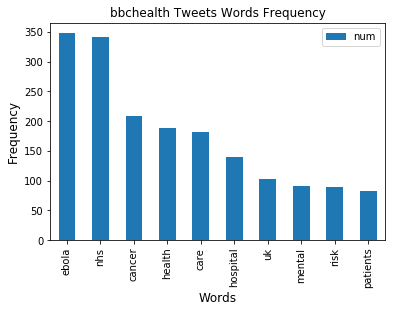

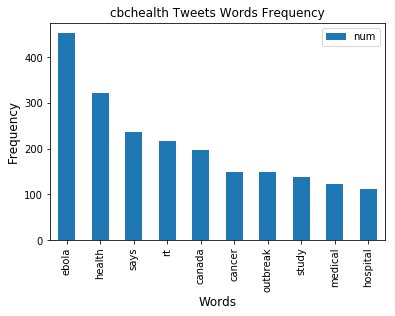

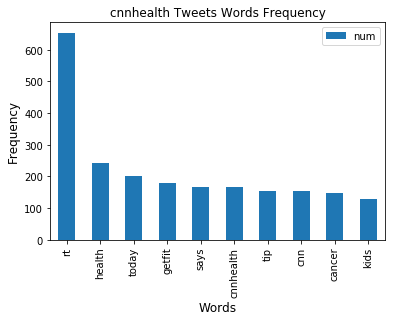

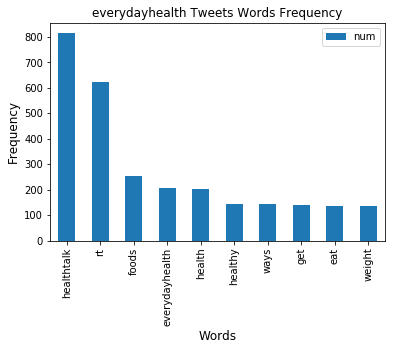

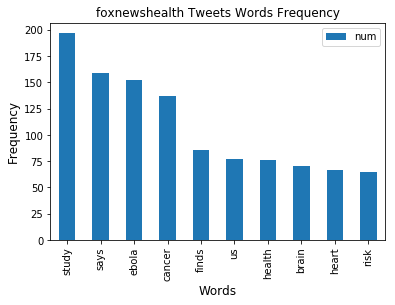

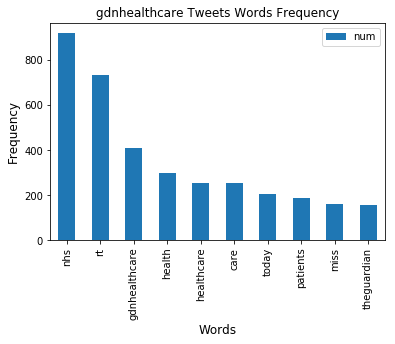

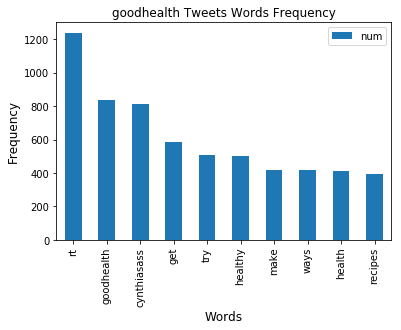

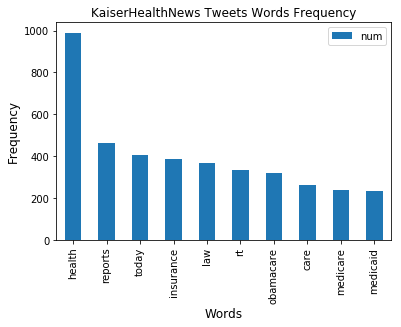

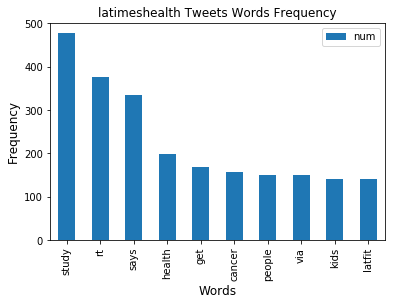

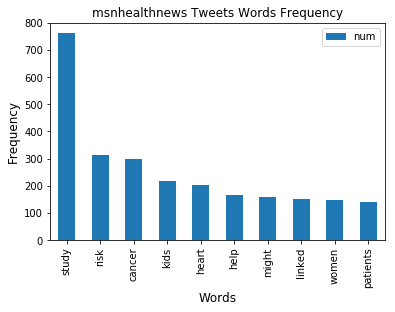

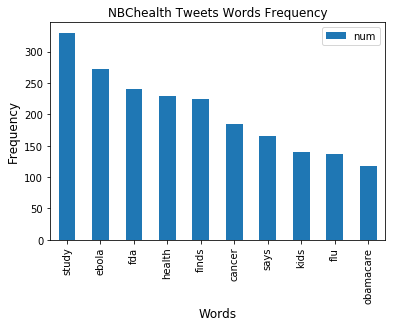

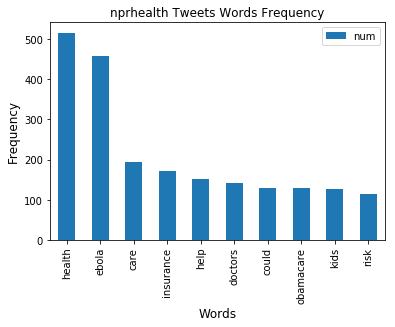

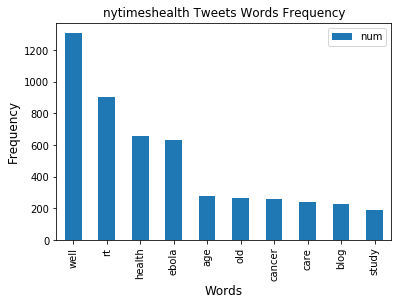

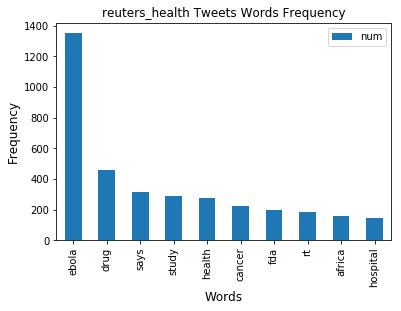

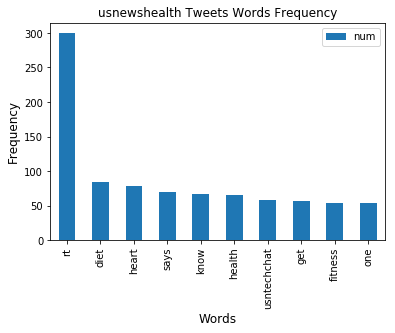

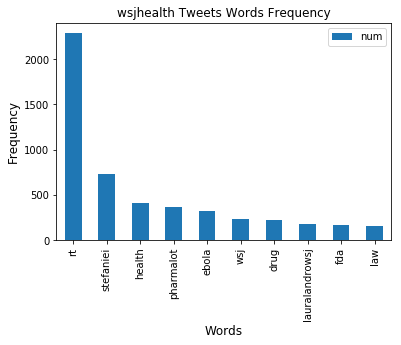

In [39]:
for file_num in range(len(files)):
    title = []
    num = []
    for i in range(10):
        title.append(word_dict[tuple(word_dict.keys())[file_num]][i][0])
        num.append(word_dict[tuple(word_dict.keys())[file_num]][i][1])

    df = pd.DataFrame(data={'title': title, 'num': num})
    # plt.bar(x='Words',y='Frequency',data=df,align='center', alpha=0.5)
    ax = df.plot.bar(x='title', y='num', rot=0)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('{} Tweets Words Frequency'.format(tuple(word_dict.keys())[file_num][:-4]))
    plt.xticks(rotation='vertical')
    plt.savefig('{}.png'.format(tuple(word_dict.keys())[file_num][:-4]), width=1000, height=1000)
    plt.show()

### From the plot we can see: after removing all unrelated words from our stop word list, most probable words are actually related to health. 